# US-Accidents-EDA

Use the "Run" button to execute the code.

## Downloading/Linking the Data to the notebook


In [1]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import opendatasets as od
download_url =('https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents')
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gokulsrilakula
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 233MB/s]


In [4]:
data_filename='us-accidents/US_Accidents_Dec21_updated.csv'

## Importing the required modules

In [135]:
import numpy as np
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

## Data Cleaning
1. Loading the Data
2. Metadata of the dataset
3. Fixing null/incorrect values

In [12]:
df=pd.read_csv(data_filename)

## Exploring the metadata of the dataset


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [16]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df.select_dtypes(include=numerics)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,33.998880,-117.370940,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
2845338,2,32.766960,-117.148060,32.765550,-117.153630,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
2845339,2,33.775450,-117.847790,33.777400,-117.857270,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
2845340,2,33.992460,-118.403020,33.983110,-118.395650,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


## Cleaning the data(replacing the missing/null values)

In [15]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [27]:
missing_data=df.isna().sum().sort_values(ascending=False)
missing_data

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

## Plotting a Bar Graph for the missing data

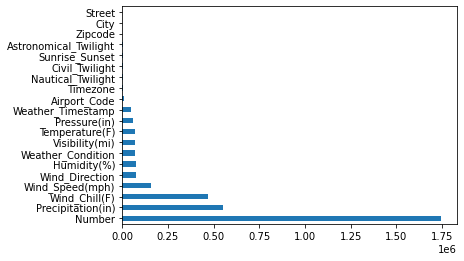

In [52]:
missing_data[missing_data !=0].plot(kind='barh')

## Exploratory Data Analysis

In [34]:
df.City
unique_cities=df.City.unique()
len(unique_cities)

11682

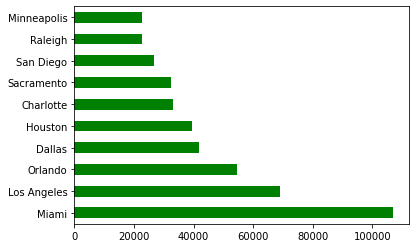

In [55]:
top_cities=df.City.value_counts()
top_cities.head(10).plot(kind='barh',color='green')

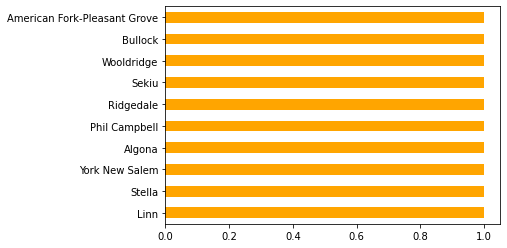

In [57]:
top_cities.tail(10).plot(kind='barh',color='orange')

In [89]:
high_accident_cities=top_cities[top_cities >= 1000]
low_accident_cities=top_cities[top_cities < 1000]

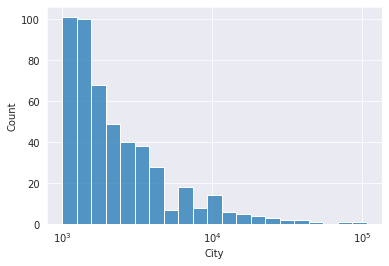

In [92]:
sns.histplot(high_accident_cities,log_scale=True)
#using log scale because the data is exponential

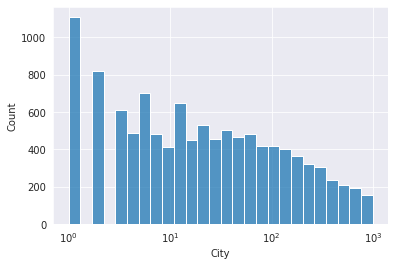

In [82]:
sns.histplot(low_accident_cities, log_scale=True)

In [90]:
len(high_accident_cities) / len(top_cities)

0.04246211796935194

In [91]:
len(low_accident_cities) / len(top_cities)

0.957537882030648

95% of the cities have accidents less than 1000 annualy

In [111]:
df.Civil_Twilight 
day_night=df.Civil_Twilight.groupby(df.Civil_Twilight).count()

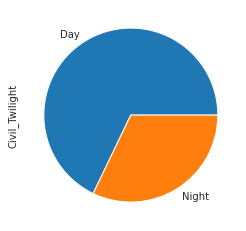

In [115]:
day_night.plot(kind='pie')

The Pie Chart denotes that the more than 50% of the accidents happened during the day


In [116]:
df.Start_Time= pd.to_datetime(df.Start_Time)

In [118]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

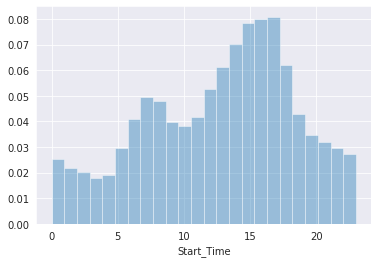

In [134]:
sns.distplot(df.Start_Time.dt.hour, bins=24, norm_hist=True,kde=False)

The accidents are more likely to occur in the evening arround 3:00 PM to 5:00 PM and the probablity of that might be due to way back to home from office


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


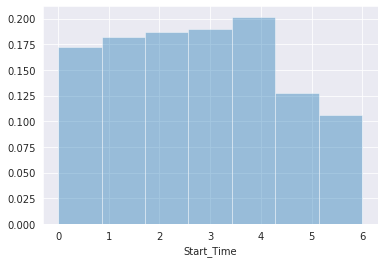

In [133]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, norm_hist=True,kde=False)

The accidents in the weekdays is more compared to the weekends

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


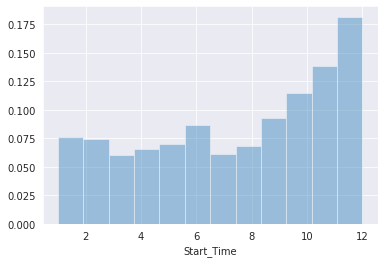

In [131]:
sns.distplot(df.Start_Time.dt.month, bins=12, norm_hist=True,kde=False)

During the first half of the year the number of accidents in consolidation zone.
During the second half of the year the number of accidents are increased gradually month by month. 


## Conclusion

During the 2nd Half of the year,Weekdays,Evenings(3:00 PM to 5:00 PM) we have observed more accidents due to the weather such as rain and fog
